In [1]:
import numpy as np

In [2]:
from sklearn.decomposition import PCA

In [3]:
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])

In [4]:
pca = PCA(n_components=2)

In [5]:
pca.fit(X)

PCA(n_components=2)

In [7]:
print(pca.singular_values_)

[6.30061232 0.54980396]


In [8]:
print(pca.explained_variance_ratio_)

[0.99244289 0.00755711]


- 读取所有人脸图片，按照命名规则获得label
- 将所有图片转换为灰度图像，并缩放成相同大小，组成[n,128,128]的数组
- 对该数组应用PCA算法进行降维处理
- 将PCA降维后数据与label分为训练集和验证集
- 对该数据使用SVM和MLP进行分类，测试验证集的准确性

In [23]:
import os
import cv2
import sys
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt

In [2]:
path1 = "E:\\code\\jupyter\\facedata" #文件夹目录
files1 = os.listdir(path1) #得到文件夹下的所有文件名称
labels = []
for file in files1: #遍历文件夹
    labels.append(file) #每个文件的文本存到list中

j = 0
dataname = []
for i in range(0, 82):
    path2 = path1 + '\\' + labels[i] + '\\'
    files2 = os.listdir(path2)
    for file in files2:#获取每个人的图片
        path3 = path2 + file
        dataname.append(path3)#dataname是所有图片的路径
        j = j + 1

In [3]:
images = []
labels = []
for index,face in enumerate(dataname):
    image = cv2.imread(face, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (128, 128))#image是一个128*128的矩阵
    images.append(image)
    labels.append(int(index))
    
for i in range(246):
    labels[i] = int(labels[i]/3)#将图像每三个分为一组

In [4]:
# 图像数据转换特征矩阵
image_data = []
for image in images:
    data = image.flatten()
    image_data.append(data)
print(image_data[0].shape)

(16384,)


In [5]:
# 转换为numpy数组
X = np.array(image_data)
y = np.array(labels)
print(type(X))
print(X.shape)

<class 'numpy.ndarray'>
(246, 16384)


In [6]:
# 画出特征矩阵
data = pd.DataFrame(X)
data

,0,1,2,3,4,5,6,7,8,9,...,16374,16375,16376,16377,16378,16379,16380,16381,16382,16383
0,245,245,245,245,245,244,243,246,246,246,...,85,88,89,88,87,86,87,88,86,83
1,221,223,225,226,226,228,232,235,238,240,...,70,69,64,85,79,82,88,91,93,94
2,203,202,203,202,202,201,199,201,200,201,...,54,44,55,40,36,58,47,43,29,56
3,75,76,77,76,74,77,78,78,78,76,...,20,20,20,20,20,17,13,14,13,15
4,68,70,66,67,68,69,69,69,70,71,...,17,20,17,18,18,20,20,23,21,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,255,255,255,255,255,255,255,255,255,255,...,49,48,49,47,48,45,44,44,42,40
242,160,154,155,157,157,155,154,146,146,151,...,96,101,94,95,92,85,102,93,95,88
243,251,251,250,251,251,251,251,251,251,251,...,123,121,123,133,141,146,146,153,153,155
244,150,150,150,150,148,151,149,150,150,149,...,124,125,123,115,103,104,111,122,132,130


In [7]:
#划分训练集和测试集
x1 = []
y1 = []
x2 = []
y2 = []
for i in range(246):
    if i%3 != 0:
        x1.append(X[i])
        y1.append(y[i])
    else:
        x2.append(X[i])
        y2.append(y[i])
        
x_train = np.array(x1)
y_train = np.array(y1)
x_test = np.array(x2)
y_test = np.array(y2)

In [8]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape, sep = '\n')

(164, 16384)
(164,)
(82, 16384)
(82,)


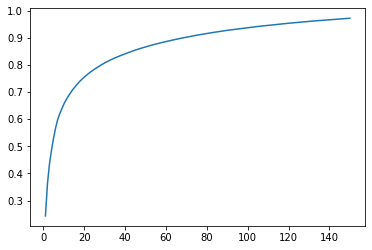

In [24]:
# 画出特征个数和所携带信息数的曲线图
explained_variance_ratio = []
for i in range(1,151): 
    pca = PCA(n_components=i).fit(X)
    explained_variance_ratio.append(pca.explained_variance_ratio_.sum())
plt.plot(range(1,151),explained_variance_ratio)
plt.show()

In [35]:
# 训练PCA模型
pca1 = PCA(n_components = 20)
pca2 = PCA(n_components = 40)
pca3 = PCA(n_components = 60)
pca4 = PCA(n_components = 80)
pca5 = PCA(n_components = 100)
pca1.fit(X)
pca2.fit(X)
pca3.fit(X)
pca4.fit(X)
pca5.fit(X)

PCA(n_components=100)

In [37]:
pca1.fit(X)

PCA(n_components=20)

In [38]:
#返回测试集和训练集降维后的数据集
x_train_pca1 = pca1.transform(x_train)
x_test_pca1 = pca1.transform(x_test)
x_train_pca2 = pca2.transform(x_train)
x_test_pca2 = pca2.transform(x_test)
x_train_pca3 = pca3.transform(x_train)
x_test_pca3 = pca3.transform(x_test)
x_train_pca4 = pca4.transform(x_train)
x_test_pca4 = pca4.transform(x_test)
x_train_pca5 = pca5.transform(x_train)
x_test_pca5 = pca5.transform(x_test)

print(x_train_pca1.shape)
print(x_test_pca1.shape)

(164, 20)
(82, 20)


In [74]:
svc = SVC(C = 2, kernel='linear', class_weight='balanced')
svc.fit(x_train_pca5, y_train)
#svc_pre = svc.predict(x_test)

SVC(C=2, class_weight='balanced', kernel='linear')

In [75]:
svc_pre = svc.predict(x_test_pca5)

In [76]:
svc_pre

array([ 0, 78,  2,  3,  4, 78,  6,  7,  8, 21, 10, 17, 12, 13, 14, 68, 16,
       78, 18, 19, 20, 21, 63, 68, 42, 25, 26, 27, 28, 29, 30, 31, 73, 17,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 69, 27, 45, 28, 39, 48, 49, 50,
       51, 68, 53, 61, 55, 64, 57, 56, 59, 60, 61, 62, 64, 64, 27, 66, 67,
       39, 49, 70,  0, 70, 10, 74, 75, 76, 24, 78, 79, 80, 81])

In [77]:
y_test

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81])

In [89]:
svc.score(x_test_pca5, y_test)

0.6707317073170732

In [96]:
model=cv2.face.EigenFaceRecognizer_create()
model.train(x_train_pca5, y_train)

In [97]:
label = []
confidence = []
for i in range(82):
    j, k = model.predict(x_test_pca5[i])
    label.append(j)
    confidence.append(k)

In [98]:
print('pca5', precision_score(y_test, label, average='micro'))

pca5 0.6585365853658537
